# Part 21: Descriptive Statistics

From Wikipedia:

A descriptive statistic (in the count noun sense) is a summary statistic that quantitatively describes or summarizes features of a collection of information,[1] while descriptive statistics in the mass noun sense is the process of using and analyzing those statistics. Descriptive statistics is distinguished from inferential statistics (or inductive statistics), in that descriptive statistics aims to summarize a sample, rather than use the data to learn about the population that the sample of data is thought to represent. This generally means that descriptive statistics, unlike inferential statistics, is not developed on the basis of probability theory, and are frequently nonparametric statistics.[2] Even when a data analysis draws its main conclusions using inferential statistics, descriptive statistics are generally also presented. For example, in papers reporting on human subjects, typically a table is included giving the overall sample size, sample sizes in important subgroups (e.g., for each treatment or exposure group), and demographic or clinical characteristics such as the average age, the proportion of subjects of each sex, the proportion of subjects with related comorbidities, etc.

Some measures that are commonly used to describe a data set are measures of central tendency and measures of variability or dispersion. __Measures of central tendency include the mean, median and mode,__ while __measures of variability include the standard deviation (or variance), the minimum and maximum values of the variables, kurtosis and skewness.__


In [16]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
os.chdir('/home/sindhuvarun/github/ML-Learning/staticsAndProbability/PythonForDataAnalytics/dataset/mtcars')
mtcars = pd.read_csv('mtcars.csv')
print(mtcars.shape)
mtcars.head(5)

(32, 12)


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [18]:
mtcars.index=mtcars['model']
del mtcars['model']
mtcars.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Measures of center

In [19]:
mtcars.mean() # Get the mean of each column

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [20]:
mtcars.mean(axis=1)  # Get the mean for each row. Doesn't make sense for this dataset, though

model
Mazda RX4              29.907273
Mazda RX4 Wag          29.981364
Datsun 710             23.598182
Hornet 4 Drive         38.739545
Hornet Sportabout      53.664545
Valiant                35.049091
Duster 360             59.720000
Merc 240D              24.634545
Merc 230               27.233636
Merc 280               31.860000
Merc 280C              31.787273
Merc 450SE             46.430909
Merc 450SL             46.500000
Merc 450SLC            46.350000
Cadillac Fleetwood     66.232727
Lincoln Continental    66.058545
Chrysler Imperial      65.972273
Fiat 128               19.440909
Honda Civic            17.742273
Toyota Corolla         18.814091
Toyota Corona          24.888636
Dodge Challenger       47.240909
AMC Javelin            46.007727
Camaro Z28             58.752727
Pontiac Firebird       57.379545
Fiat X1-9              18.928636
Porsche 914-2          24.779091
Lotus Europa           24.880273
Ford Pantera L         60.971818
Ferrari Dino           34.508182
Mase

The median of a distribution is the value where 50% of the data lies below it and 50% lies above it. In essence, the median splits the data in half. The median is also known as the 50% percentile since 50% of the observations are found below it.

In [21]:
mtcars.median()

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

Although the mean and median both give us some sense of the center of a distribution, they aren't always the same. The median always gives us a value that splits the data into two halves while the mean is a numeric average so extreme values can have a significant impact on the mean. In a symmetric distribution, the mean and median will be the same. Let's investigate with a density plot:

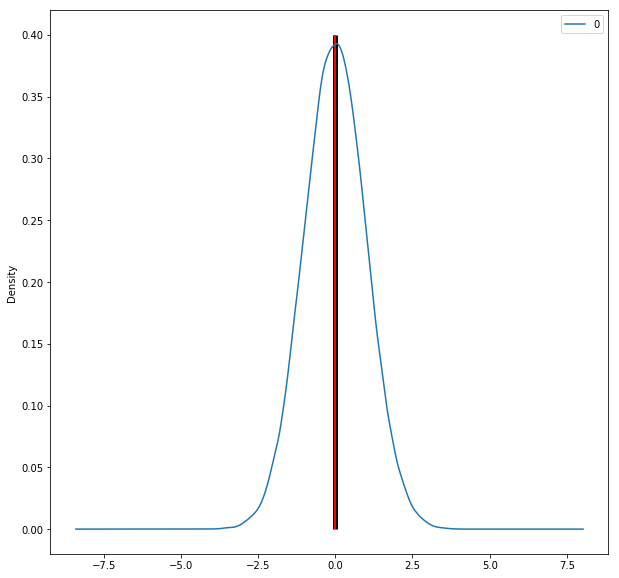

In [23]:
norm_data = pd.DataFrame(np.random.normal(size=100000))
norm_data.plot(kind='density', figsize=(10,10))

plt.vlines(norm_data.mean(),ymin=0, ymax=0.4, linewidth=5.0)
plt.vlines(norm_data.median(), ymin=0, ymax=0.4, linewidth=2.0, color='red')

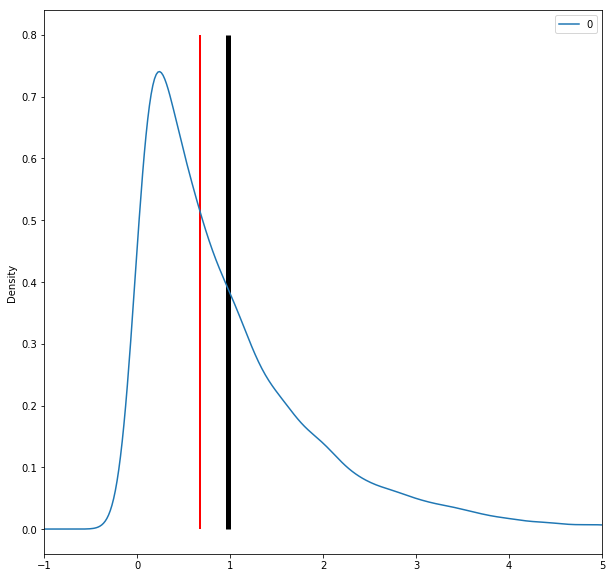

In [25]:
# Skewed data
skewed_data = pd.DataFrame(np.random.exponential(size=10000))
skewed_data.plot(kind='density', figsize=(10,10), xlim=(-1,5))

plt.vlines(skewed_data.mean(), linewidth=5, ymin=0, ymax=0.8)
plt.vlines(skewed_data.median(), linewidth=2, ymin=0, ymax=0.8, color='red')

__Since the median tends to resist the effects of skewness and outliers, it is known a "robust" statistic. The median generally gives a better sense of the typical value in a distribution with significant skew or outliers.__

In [26]:
mtcars.mode()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,10.4,8.0,275.8,110.0,3.07,3.44,17.02,0.0,0.0,3.0,2.0
1,15.2,NaN,NaN,175.0,3.92,NaN,18.90,NaN,NaN,NaN,4.0
2,19.2,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Measures of Spread

Measures of spread (dispersion) are statistics that describe how data varies. While measures of center give us an idea of the typical value, measures of spread give us a sense of how much the data tends to diverge from the typical value.

In [27]:
# Range = max - min
max(mtcars['mpg'])  - min(mtcars['mpg'])

23.5

##### Quartiles
As noted earlier, the median represents the 50th percentile of a data set. A summary of several percentiles can be used to describe a variable's spread. We can extract the minimum value (0th percentile), first quartile (25th percentile), median, third quartile(75th percentile) and maximum value (100th percentile) using the quantile() function. They are called the 5-number summary

In [29]:
quartiles = [    
            mtcars['mpg'].quantile(0),
            mtcars['mpg'].quantile(0.25),
            mtcars['mpg'].quantile(0.5),
            mtcars['mpg'].quantile(0.75),
            mtcars['mpg'].quantile(1),
            ]
quartiles

[10.4, 15.425, 19.2, 22.8, 33.9]

In [30]:
#quartiles are also given by df.describe()
mtcars['mpg'].describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

In [32]:
#IQR = 3rd quartile - 1st quartile
# boxplots also gives this information 
mtcars['mpg'].quantile(0.75 ) - mtcars['mpg'].quantile(0.25)

7.375

__Variance__ and standard deviation are two other common measures of spread. The variance of a distribution is the average of the squared deviations (differences) from the mean. Use df.var() to check variance:

In [33]:
mtcars['mpg'].var()

36.32410282258064

The __standard deviation__ is the square root of the variance. Standard deviation can be more interpretable than variance, since the standard deviation is expressed in terms of the same units as the variable in question while variance is expressed in terms of units squared. Use df.std() to check the standard deviation:

In [34]:
mtcars['mpg'].std()

6.026948052089104

### Skewness and Kurtosis

__Skewness__ measures the skew or asymmetry of a distribution.

From Wikipedia:
Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined. 

Negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right.

! (https://en.wikipedia.org/wiki/File:Negative_and_positive_skew_diagrams_(English).svg)

Kurtosis measure the peakedness of a distribution

Wikipedia: Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.

In [35]:
mtcars['mpg'].skew()

0.6723771376290826

In [36]:
mtcars['mpg'].kurt()

-0.022006291424083724